# Waiting for R2...
> How long does it take for a computational neuroscience paper to get accepted after a submission to Nature Neuroscience? I wanted to know, so I built a scraper.

- comments: true
- author: Caglar Cakan
- categories: [data, neuroscience]
- permalink: /nature-neuroscience-submission/
- image: images/icon_natureneuroscience.png
- license: Creative Commons

Every academic knows that quite some time can pass from submission of a paper to a journal until acceptance and eventually publication. Whether it's the tedious communications with the Editors about the font size of a figure label or the questions in suspiciously minute detail from Reviewer 2.  

Past publications in a journal can be indicative for how long your own submission process could take. For this case study, I have looked at how long it takes for papers in the field of [Computational Neuroscience](https://en.wikipedia.org/wiki/Computational_neuroscience) (which is the field I am working in) to be accepted at [Nature Neuroscience](https://www.nature.com/neuro/), one of the most prestigious neuroscience journals out there. 

In [1]:
#hide
from dateutil import parser
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md

In [2]:
#hide
#plt.style.use("light")

To get this information, we can crawl publicly available data from the [Nature website](https://www.nature.com/). Every article's page has the time of submission, acceptance and publication that we can gather to compute an average. An [example](https://www.nature.com/articles/nn.2983) is shown below.

<p align="center">
  <img src="../images/nature_screenshot.png">
</p>

We use the wonderful functions provided in `requests_html` to scrape the data. The script below goes through all search results from the Nature website, filtered by a specific subject, in this case it is "computational-neuroscience". We get a list of all articles by filtering the relevant elements we want to iterate through using the function `base_html.html.find()`. Then, we can easily get the relevant elements of the search results (the title and the html links to each article for example) using the attributes `.text` and `.links`.

In [3]:
#hide_output
from requests_html import HTMLSession
session = HTMLSession()

data = pd.DataFrame(columns=['journal', 'url', 'title', 'received', 'accepted', 'published', 'timeForAcceptance', 'timeForPublishing'])

for page_nr in range(1, 5):
    
    base_url = "https://www.nature.com/search?order=relevance&journal=neuro&subject=computational-neuroscience&article_type=research&page="
    
    base_url +=  str(page_nr)
    base_html = session.get(base_url)

    articles_journal = base_html.html.find('div.grid.grid-7.mq640-grid-12.mt10')
    articles = base_html.html.find("a[href*=articles]")

    for ai, a in enumerate(articles_journal):
        filter_journal = 'Nature Neuroscience'
        if filter_journal in a.text:
            print(" - - - - - - - - ")
            print('Article nr {} on page {} in Journal {}'.format(ai, page_nr, filter_journal))
            article_title = articles[ai].text
            print("\"{}\"".format(article_title))
            article_suburl = list(articles[ai].links)[0]

            article_url = "https://www.nature.com{}".format(article_suburl)
            print("Getting {}".format(article_url))
            article_html = session.get(article_url)

            dates = article_html.html.find("time")
            print('> Received: ', dates[1].attrs['datetime'])
            print('> Accepted: ', dates[2].attrs['datetime'])
            print('> Published: ', dates[3].attrs['datetime'])
            received_date = parser.parse(dates[1].attrs['datetime'])
            accepted_date = parser.parse(dates[2].attrs['datetime'])
            published_date = parser.parse(dates[3].attrs['datetime'])

            timeForAcceptance = accepted_date - received_date
            timeForPublishing = published_date - received_date

            print(timeForAcceptance, 'between',received_date, 'and', accepted_date)

            data = data.append({'journal' : filter_journal, 
                 'url' : article_suburl,
                 'title' : article_title,
                 'received' : received_date,
                 'accepted' : accepted_date, 
                 'published' : published_date,
                 'timeForAcceptance' : timeForAcceptance,
                 'timeForPublishing' : timeForPublishing}, ignore_index = True)

 - - - - - - - - 
Article nr 0 on page 1 in Journal Nature Neuroscience
"Hippocampal neurons represent events as transferable units of experience"
Getting https://www.nature.com/articles/s41593-020-0614-x
> Received:  2019-08-27
> Accepted:  2020-02-20
> Published:  2020-04-06
177 days, 0:00:00 between 2019-08-27 00:00:00 and 2020-02-20 00:00:00
 - - - - - - - - 
Article nr 1 on page 1 in Journal Nature Neuroscience
"Machine translation of cortical activity to text with an encoder–decoder framework"
Getting https://www.nature.com/articles/s41593-020-0608-8
> Received:  2019-08-23
> Accepted:  2020-02-10
> Published:  2020-03-30
171 days, 0:00:00 between 2019-08-23 00:00:00 and 2020-02-10 00:00:00
 - - - - - - - - 
Article nr 2 on page 1 in Journal Nature Neuroscience
"Implicit adaptation compensates for erratic explicit strategy in human motor learning"
Getting https://www.nature.com/articles/s41593-020-0600-3
> Received:  2017-05-22
> Accepted:  2020-01-28
> Published:  2020-02-28
981

Let's have a look at the aggregated Dataframe:

In [4]:
data

,journal,url,title,received,accepted,published,timeForAcceptance,timeForPublishing
0,Nature Neuroscience,/articles/s41593-020-0614-x,Hippocampal neurons represent events as transf...,2019-08-27,2020-02-20,2020-04-06,177 days,223 days
1,Nature Neuroscience,/articles/s41593-020-0608-8,Machine translation of cortical activity to te...,2019-08-23,2020-02-10,2020-03-30,171 days,220 days
2,Nature Neuroscience,/articles/s41593-020-0600-3,Implicit adaptation compensates for erratic ex...,2017-05-22,2020-01-28,2020-02-28,981 days,1012 days
3,Nature Neuroscience,/articles/s41593-020-0586-x,Spatiotemporal single-cell analysis of gene ex...,2019-02-07,2020-01-03,2020-02-17,330 days,375 days
4,Nature Neuroscience,/articles/s41593-019-0576-z,Whitening of odor representations by the wirin...,2019-02-14,2019-12-12,2020-01-20,301 days,340 days
...,...,...,...,...,...,...,...,...
182,Nature Neuroscience,/articles/nn.2797,Reversible large-scale modification of cortica...,2011-01-12,2011-03-04,2011-04-17,51 days,95 days
183,Nature Neuroscience,/articles/nn.2904,Differential roles of human striatum and amygd...,2011-04-12,2011-07-07,2011-09-11,86 days,152 days
184,Nature Neuroscience,/articles/nn.2868,High-accuracy neurite reconstruction for high-...,2011-02-28,2011-05-23,2011-07-10,84 days,132 days
185,Nature Neuroscience,/articles/nn.2693,Hippocampal brain-network coordination during ...,2010-07-12,2010-10-06,2010-11-21,86 days,132 days


We need to put the data into buckets of years and days for calculating the average.

In [5]:
data['year'] = data.apply(lambda row: row.published.year, axis=1)
data['days'] = data.apply(lambda row: row.timeForAcceptance.days, axis=1)
data['daysp'] = data.apply(lambda row: row.timeForPublishing.days, axis=1)

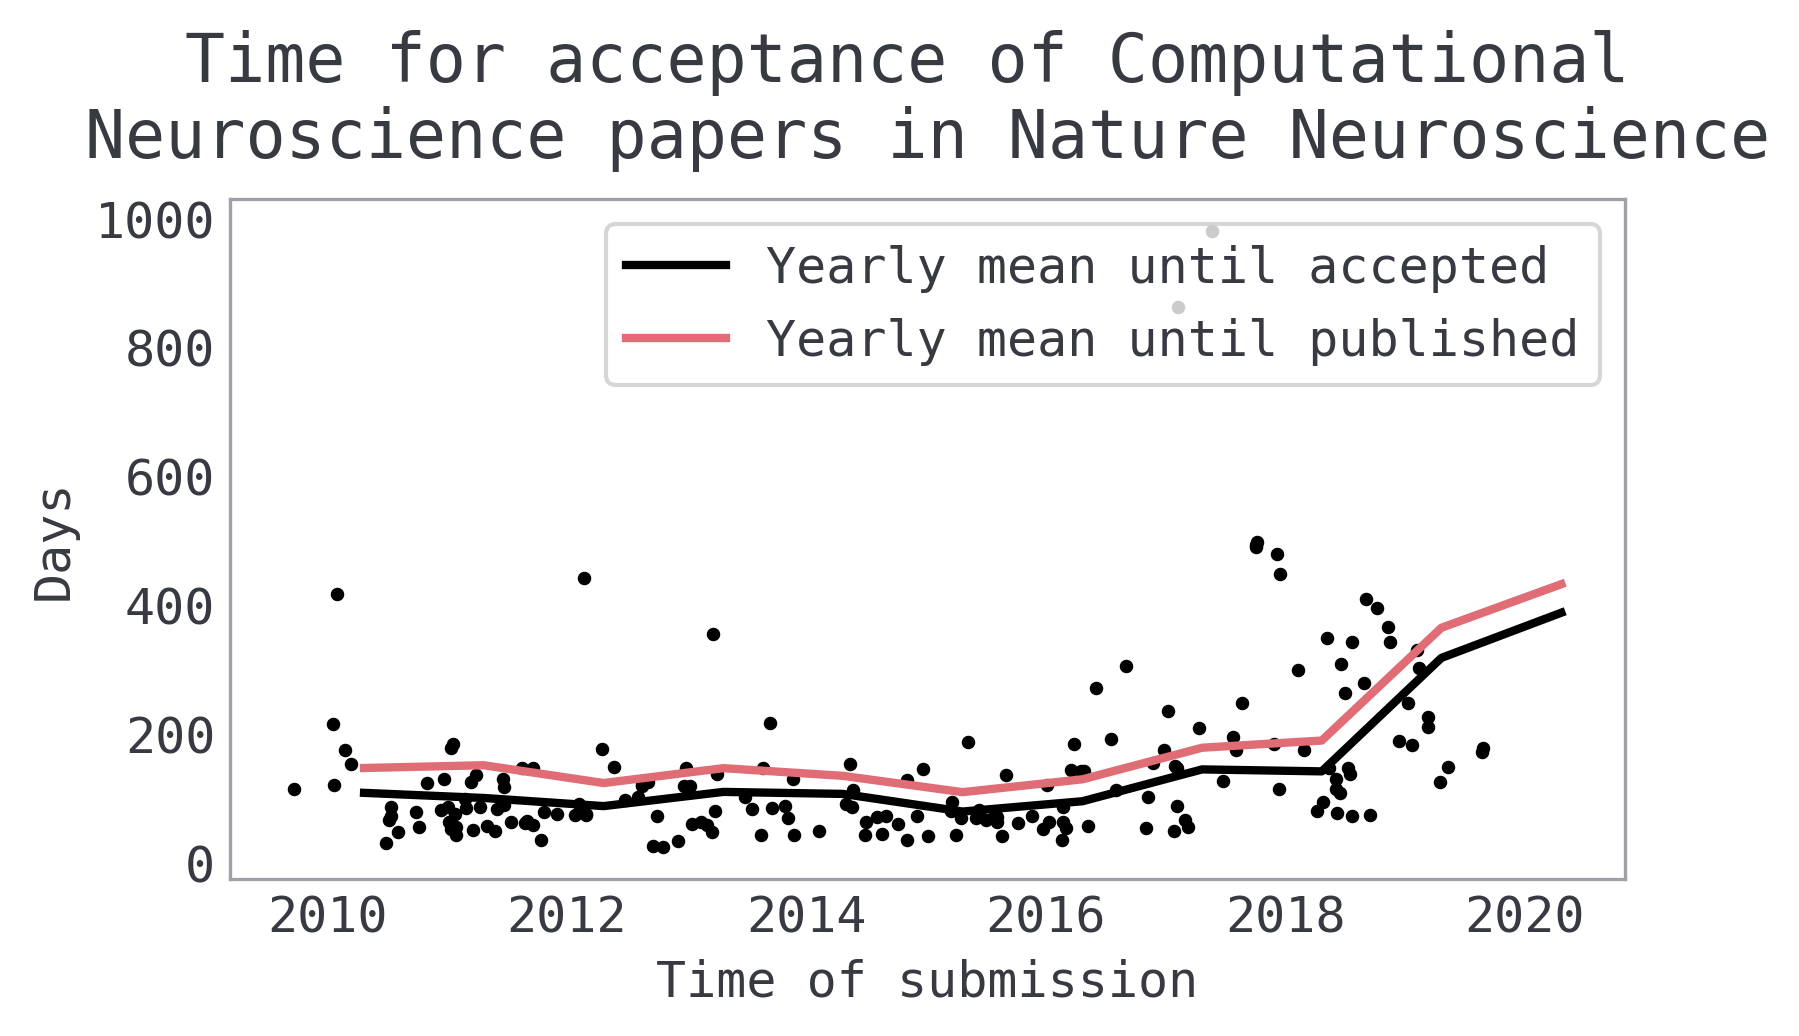

In [6]:
plt.figure(figsize=(6, 3), dpi=300)
ax=plt.gca()
xfmt = md.DateFormatter('%Y')
ax.xaxis.set_major_formatter(xfmt)


years = [parser.parse(str(data.groupby(by='year').days.mean().index[d])) for d in range(len(data.groupby(by='year')))]
mean_time = data.groupby(by='year').days.mean()
std_time = data.groupby(by='year').days.std()
plt.plot(years, mean_time, label='Yearly mean until accepted', c='k')

plt.plot(years, data.groupby(by='year').daysp.mean(), label='Yearly mean until published', c='C0')
plt.legend()
ax.set_facecolor('white')
ax.patch.set_alpha(1.0)

for di in range(len(data)):
    plt.scatter(data.iloc[di].received, data.iloc[di].days, c='k', s=5)
    
plt.xlabel("Time of submission")
plt.ylabel("Days")
plt.title("Time for acceptance of Computational\nNeuroscience papers in Nature Neuroscience")
plt.savefig("../images/icon_natureneuroscience.png");

# So, how long?

In [7]:
data.days.mean()

143.2673796791444

In [1]:
#hide_input
import datetime
print("This page was last built on", datetime.datetime.now().strftime("%d.%m.%y %H:%M:%S"))

This page was last built on 26.04.20 00:36:49
